# House Prices - Keagle

## Dataset

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/

http://jse.amstat.org/v19n3/decock.pdf

In [8]:
# Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [9]:
all_data = pd.read_csv('treino.csv')
app = pd.read_csv("teste.csv")

target = np.log1p(all_data["SalePrice"])

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) 
skewed_feats = skewed_feats[skewed_feats > 0.75].index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())
all_col = list(all_data.columns)
app_col = list(app.columns)

eq = [i for i in all_col if i in app_col]
diff = [i for i in all_col if i not in app_col]
[all_data.drop(item,axis=1,inplace=True) for item in diff]


app = app[eq]
numeric_feats = app.dtypes[app.dtypes != "object"].index
skewed_feats = app[numeric_feats].apply(lambda x: skew(x.dropna())) 
skewed_feats = skewed_feats[skewed_feats > 0.75].index
app[skewed_feats] = np.log1p(app[skewed_feats])
app = pd.get_dummies(app)
app = app.fillna(app.mean())

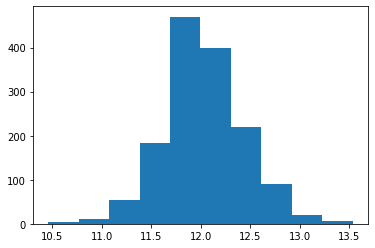

37


In [10]:
plt.hist(target)
plt.show()

print(len(app.columns))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(all_data,target,test_size=0.2)

In [12]:
reg = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 101)

In [13]:
modelo = reg.fit(X_train, y_train)

In [14]:
modelo

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

In [15]:
modelo.score(X_test,y_test)

0.8736753142777004

In [50]:
previsoes = pd.DataFrame(modelo.predict(app),columns=['SalePrice'])
excel_pandas = pd.concat([all_data['Id'],previsoes],axis=1, join='inner')


In [51]:
excel = pd.ExcelWriter('previsoes.xlsx', engine='xlsxwriter')
excel_pandas.to_excel(excel)
excel.save()